In [64]:
from keras.datasets import reuters
from keras import models, layers, optimizers, losses, activations
import numpy as np

In [65]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [66]:
#Visualize the data
print('len',len(x_train))
print('ndims',x_train.ndim)
print('shape', x_train.shape)
print(x_train[0])
print(len(y_train))
print(y_train[0])

len 8982
ndims 1
shape (8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
8982
3


In [67]:
word_index = reuters.get_word_index()

In [68]:
print(len(word_index))
print(type(word_index))
# print(word_index.keys())

30979
<class 'dict'>


In [69]:
reversed_index = dict([(value, key) for (key,value) in word_index.items()])
' '.join([reversed_index.get(i-3, '') for i in x_train[0]])

'   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [70]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(x_train)
# Our vectorized test data
x_test = vectorize_sequences(x_test)

In [77]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
y_train = to_one_hot(y_train)
# Our vectorized test labels
y_test = to_one_hot(y_test)

In [78]:
#model

model = models.Sequential()
model.add(layers.Dense(512, activation=activations.relu, input_shape =(10000,)))
model.add(layers.Dense(256, activation=activations.relu))
model.add(layers.Dense(46, activation=activations.softmax))

In [79]:
# model.compile(optimizer=optimizers.rmsprop, loss=losses.categorical_crossentropy, metrics=['acc'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [97]:
history = model.fit(x_train, y_train, epochs=15, batch_size=512, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/15
8982/8982 [==============================] - 7s 798us/step - loss: 0.0793 - acc: 0.9561 - val_loss: 1.5387 - val_acc: 0.8010
Epoch 2/15
8982/8982 [==============================] - 8s 891us/step - loss: 0.0754 - acc: 0.9567 - val_loss: 1.6772 - val_acc: 0.7894
Epoch 3/15
8982/8982 [==============================] - 7s 822us/step - loss: 0.0763 - acc: 0.9557 - val_loss: 1.6709 - val_acc: 0.7872
Epoch 4/15
8982/8982 [==============================] - 7s 811us/step - loss: 0.0744 - acc: 0.9544 - val_loss: 1.6446 - val_acc: 0.7947
Epoch 5/15
8982/8982 [==============================] - 7s 806us/step - loss: 0.0721 - acc: 0.9560 - val_loss: 1.7434 - val_acc: 0.7881
Epoch 6/15
8982/8982 [==============================] - 7s 790us/step - loss: 0.0705 - acc: 0.9570 - val_loss: 1.7166 - val_acc: 0.7930
Epoch 7/15
8982/8982 [==============================] - 7s 753us/step - loss: 0.0705 - acc: 0.9550 - val_loss: 1.8155 - val_acc: 0.7854


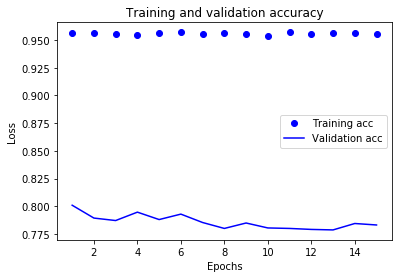

In [101]:
plt.clf()      # clear figure# clear  

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()